In [1]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import joblib
import os

In [2]:
df = pd.read_csv('Students Social Media Addiction.csv')
df.head()
df.drop(['Student_ID', 'Country'], axis=1, inplace=True)
df

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,23,Male,Graduate,6.8,Instagram,Yes,5.9,4,Single,5,9
702,21,Female,Undergraduate,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,24,Male,Graduate,4.3,Twitter,No,7.5,8,Single,2,4


# One-Hot Encoding to **Categorical Values**

## 1. One-Hot Encode Binary Columns

In [3]:
binary_cols = ['Gender', 'Affects_Academic_Performance']

# Initialize encoder
binary_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform binary columns
binary_encoded = binary_encoder.fit_transform(df[binary_cols])

# Convert to DataFrame
binary_encoded_df = pd.DataFrame(binary_encoded, 
                                 columns=binary_encoder.get_feature_names_out(binary_cols),
                                 index=df.index)

# Combine with original DataFrame (dropping original binary columns)
df_binary_encoded = pd.concat([df.drop(binary_cols, axis=1), binary_encoded_df], axis=1)
df_binary_encoded.head(5)

,Age,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Affects_Academic_Performance_Yes
0,19,Undergraduate,5.2,Instagram,6.5,6,In Relationship,3,8,0.0,1.0
1,22,Graduate,2.1,Twitter,7.5,8,Single,0,3,1.0,0.0
2,20,Undergraduate,6.0,TikTok,5.0,5,Complicated,4,9,0.0,1.0
3,18,High School,3.0,YouTube,7.0,7,Single,1,4,1.0,0.0
4,21,Graduate,4.5,Facebook,6.0,6,In Relationship,2,7,1.0,1.0


**Code Explination**
- Gender_Male column tells if the student is **Male**.
- Female is encoded implicitly: if **Gender_Male = 0**, then the student is Female.
- **drop='first'** removed the first category (usually the one that comes first alphabetically, or the first in your data).

## 2. One-Hot Encode Multi-class Columns

In [4]:
multi_cols = ['Academic_Level', 'Most_Used_Platform', 'Relationship_Status']

# Initialize encoder
multi_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform multi-class columns
multi_encoded = multi_encoder.fit_transform(df_binary_encoded[multi_cols])

# Convert to DataFrame
multi_encoded_df = pd.DataFrame(multi_encoded, 
                                columns=multi_encoder.get_feature_names_out(multi_cols),
                                index=df.index)

# Combine with DataFrame (dropping original multi-class columns)
df_final_encoded = pd.concat([df_binary_encoded.drop(multi_cols, axis=1), multi_encoded_df], axis=1)

df_final_encoded.head(5)


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Affects_Academic_Performance_Yes,Academic_Level_High School,Academic_Level_Undergraduate,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
0,19,5.2,6.5,6,3,8,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,22,2.1,7.5,8,0,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20,6.0,5.0,5,4,9,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,3.0,7.0,7,1,4,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,21,4.5,6.0,6,2,7,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Code Explination**
- Each multi-class column (e.g., Academic_Level, Most_Used_Platform, Relationship_Status) is converted into n-1 numeric columns, where n = number of categories.
- **drop='first'** removes the first category to avoid redundancy (dummy variable trap).
- **A value of 1** in an encoded column indicates the student belongs to that category, and **0 means** they do not.
- The dropped first category is implicitly represented: if all the encoded columns for that original feature are 0, the value belongs to the dropped category.
- The result is a fully numeric DataFrame ready for ML or analysis.
- **Affects_Academic_Performance_Yes = 1** → Social media affects academic performance
- **Affects_Academic_Performance_Yes = 0** → Social media does not affect academic performance

Preprocessing complete! Data and encoders saved in one file.


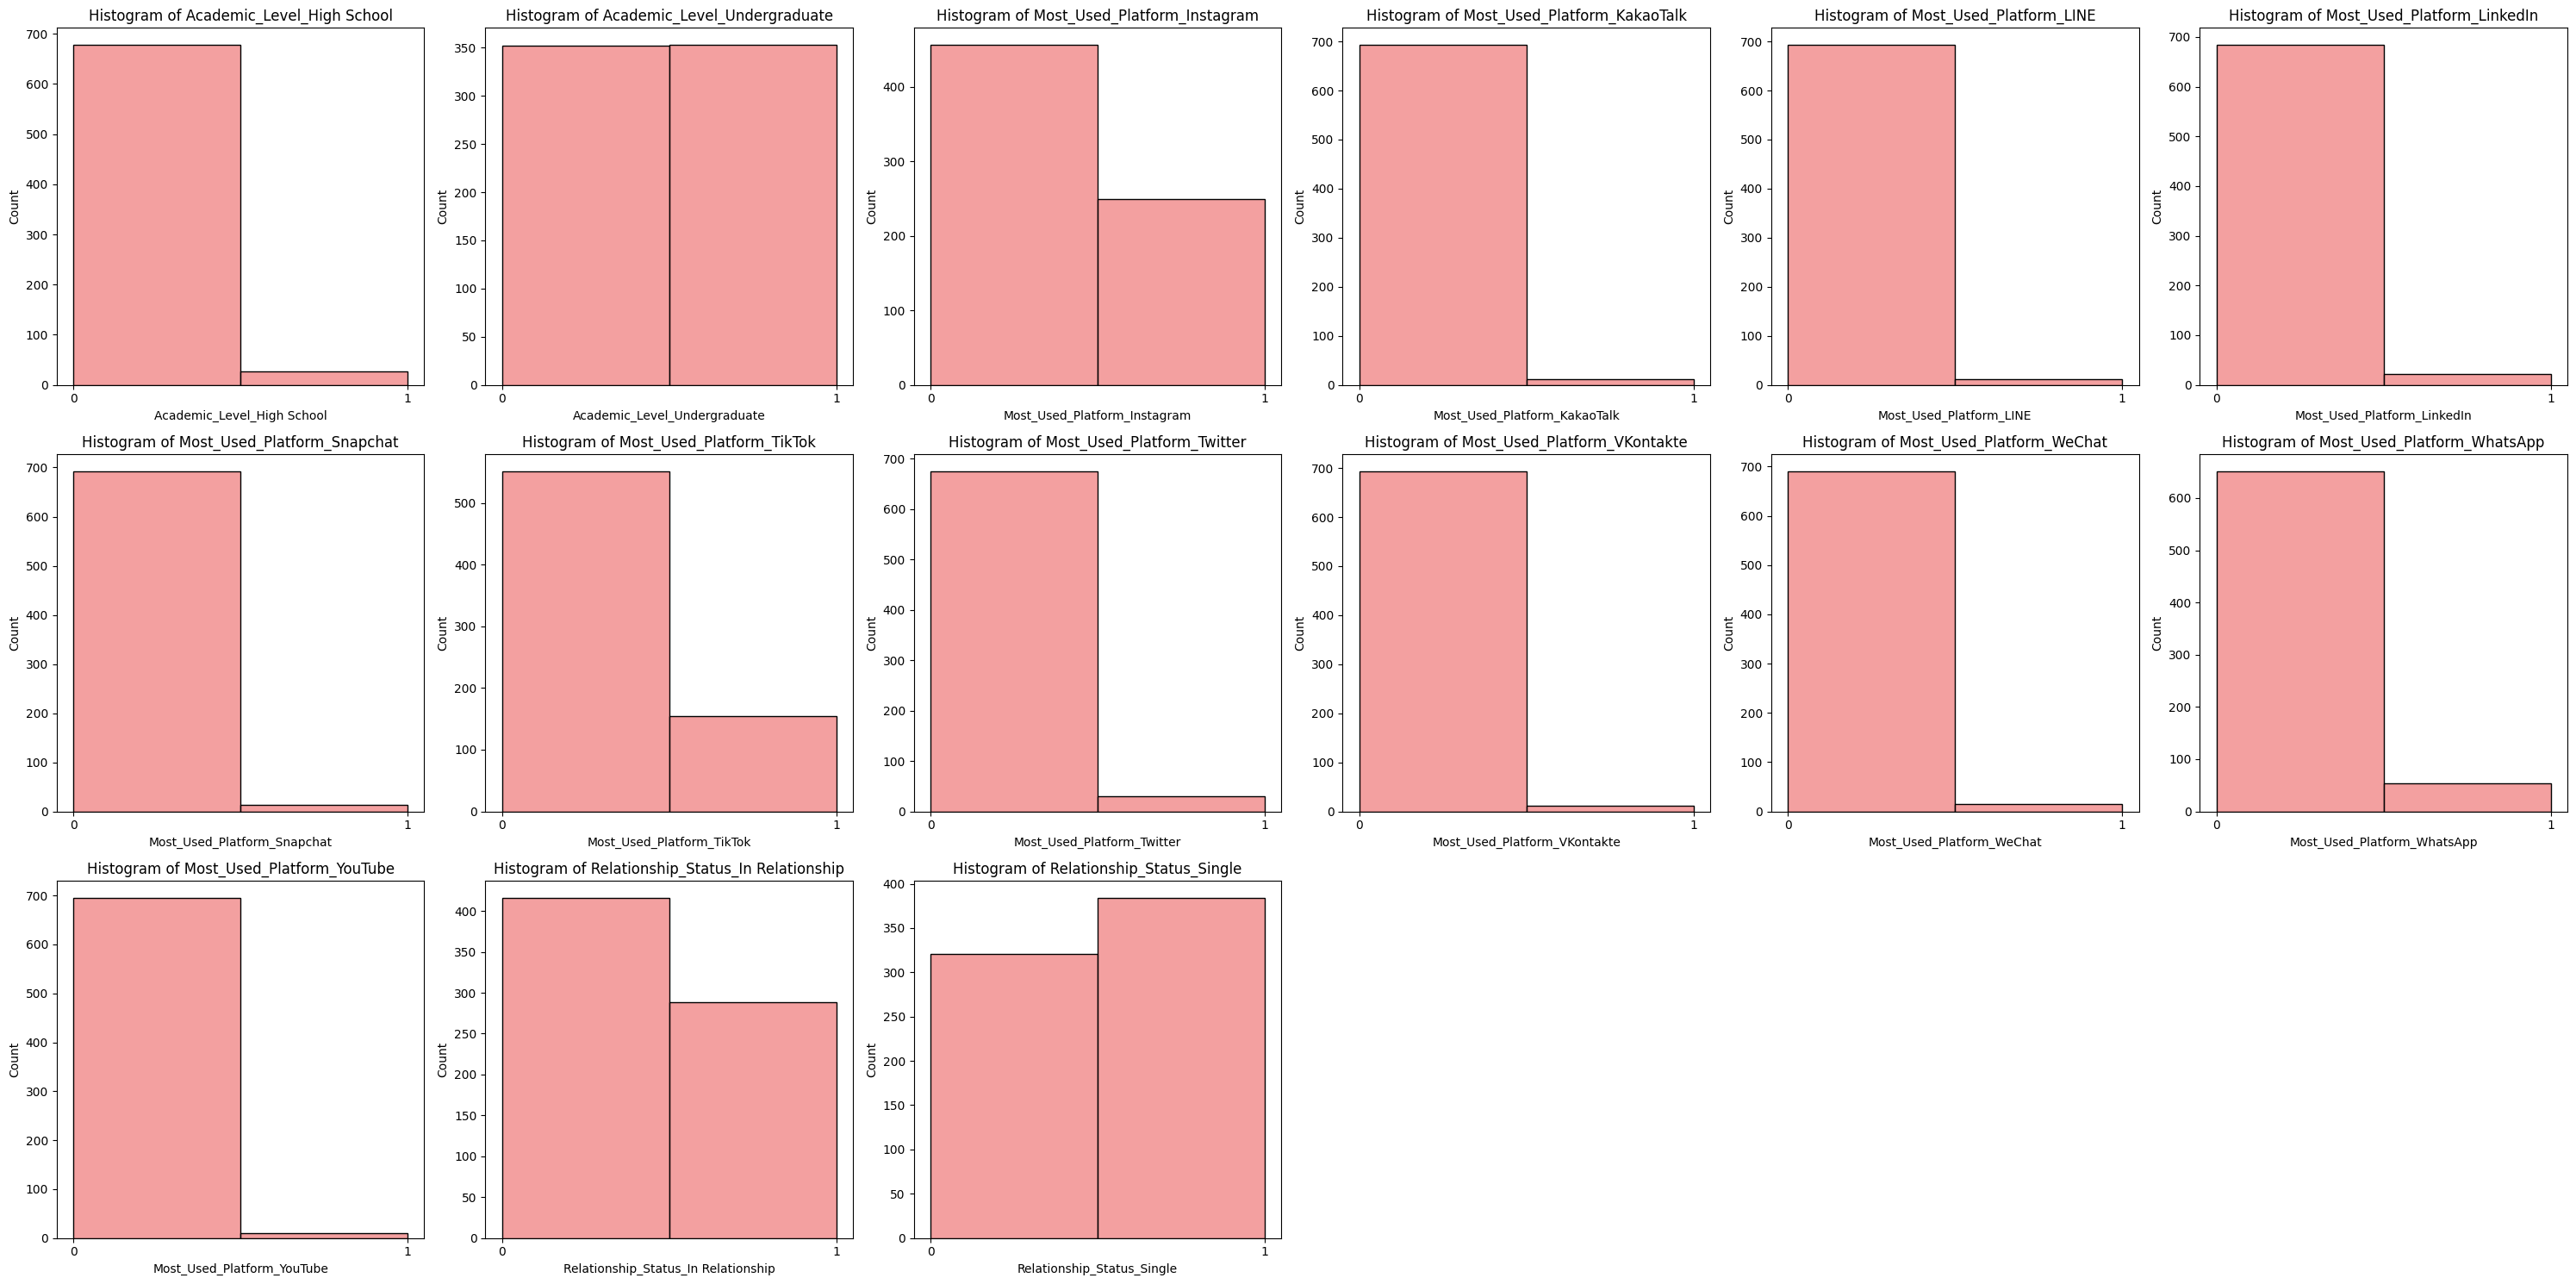

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Saving data to load
os.makedirs("../outputs", exist_ok=True)

# Save everything in one joblib file

preprocessing_objects = {
    "data": df_final_encoded,
    "binary_encoder": binary_encoder,
    "multi_encoder": multi_encoder
}

joblib.dump(preprocessing_objects, "../outputs/preprocessing_all.pkl")
print("Preprocessing complete! Data and encoders saved in one file.")


# List of multi-class one-hot encoded columns
multi_encoded_cols = [col for col in df_final_encoded.columns if 
                      col.startswith('Academic_Level_') or 
                      col.startswith('Most_Used_Platform_') or 
                      col.startswith('Relationship_Status_')]

# Plot histograms
plt.figure(figsize=(30,15))
for i, col in enumerate(multi_encoded_cols):
    plt.subplot(3, len(multi_encoded_cols)//3 + 1, i+1)
    sns.histplot(df_final_encoded[col], bins=2, kde=False, color='lightcoral')
    plt.xticks([0,1])
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


### **Insights from the histograms**

### 1️⃣ Academic_Level_

- Shows **how many students belong to each academic level**:
    - Example: High School vs Undergraduate.
- Helps understand **distribution across academic levels**.

### 2️⃣ Most_Used_Platform_

- Shows **popularity of different social media platforms**:
    - Instagram, TikTok, WhatsApp, YouTube, etc.
- Can reveal **which platforms are most/least used** by students.

### 3️⃣ Relationship_Status_

- Shows **how many students are single vs in a relationship**.
- Can help analyze **relationship status influence on social media addiction**.

### Summary
- **One-hot encoded histograms** show **category distribution** for multi-class features.
- Most bars will be 0 or 1 → 1 indicates the student **belongs to that category**.
- Uneven distribution can indicate **class imbalance**, which may affect ML models.
- Useful for **EDA (exploratory data analysis) and feature selection**.

In [6]:
# 3. Handling Outliers

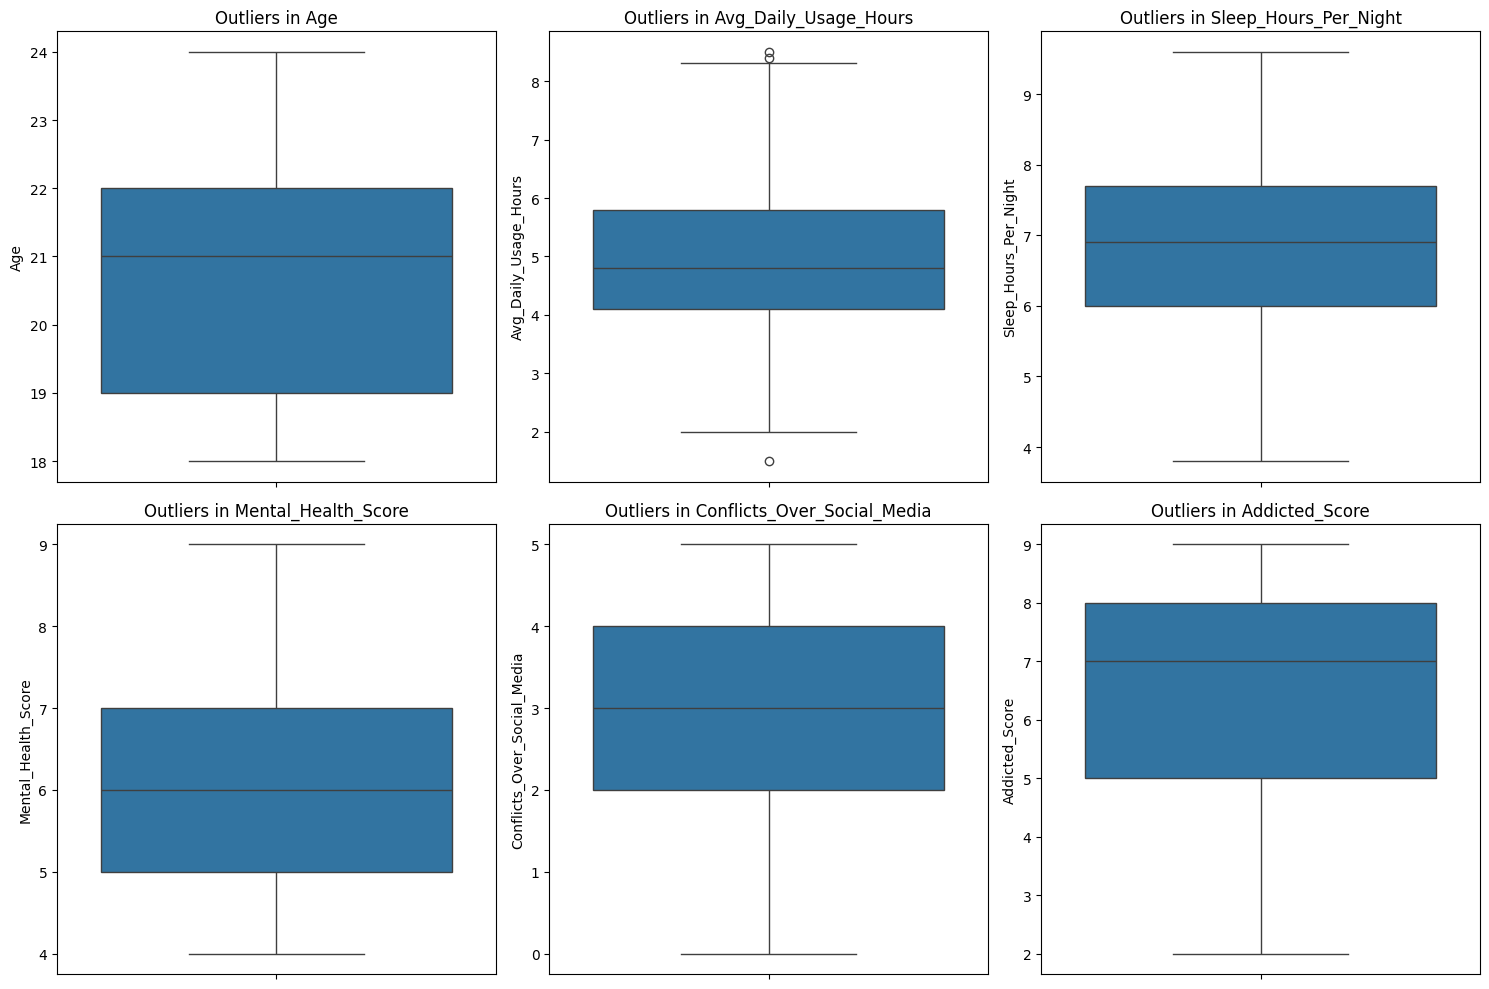

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
outlier_cols = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]

# Plot boxplots for each column
plt.figure(figsize=(15, 10))

for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of plots
    sns.boxplot(y=df[col])   # vertical boxplot
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()


**Insights** 

**1. Age**

- Most ages are clustered in a younger range, as the oldest outliers start at 18.
- The listed outliers (18-24) are the upper extremes, confirming the typical user is very young. The lower outliers (ages 2-8) are extreme and likely a separate group.

**2. Avg_Daily_Usage_Hours (Daily Social Media Usage)**

- Majority of users have moderate usage.
- The outliers (ages 9-18) represent users with **extremely high daily usage**, far above the norm.

**3. Sleep_Hours_Per_Night**

- Most users get a typical amount of sleep.
- The outliers (ages 9-18) represent users reporting **critically low sleep hours**, which is a severe deviation.

**4. Mental_Health_Score**

- Scores are mostly clustered in a normal range.
- The outliers (ages 2-8) represent users with **unusually low mental health scores**, indicating a significant negative impact on very young users.

**5. Conflicts_Over_Social_Media**

- Most users experience a typical number of conflicts.
- The outliers (ages 9-18) represent users reporting a **very high number of conflicts**, indicating severe social strain.

**6. Addicted_Score**

- Scores are mostly clustered in a mid-range.
- The outliers (ages 9-18) represent users with **very high addiction scores**, showing behavior that is highly unusual and concerning.

In [8]:
df_binary_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               705 non-null    int64  
 1   Academic_Level                    705 non-null    object 
 2   Avg_Daily_Usage_Hours             705 non-null    float64
 3   Most_Used_Platform                705 non-null    object 
 4   Sleep_Hours_Per_Night             705 non-null    float64
 5   Mental_Health_Score               705 non-null    int64  
 6   Relationship_Status               705 non-null    object 
 7   Conflicts_Over_Social_Media       705 non-null    int64  
 8   Addicted_Score                    705 non-null    int64  
 9   Gender_Male                       705 non-null    float64
 10  Affects_Academic_Performance_Yes  705 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 60.7+ KB


In [9]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Addicted_Score                       705 non-null    int64  
 6   Gender_Male                          705 non-null    float64
 7   Affects_Academic_Performance_Yes     705 non-null    float64
 8   Academic_Level_High School           705 non-null    float64
 9   Academic_Level_Undergraduate         705 non-null    float64
 10  Most_Used_Platform_Instagram         705 non-null    float64
 11  Most_Used_Platform_KakaoTalk    